In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Groupby한 Series에서 4, 5 act_label 널값 처리를 못 하고 있다.

act = pd.read_csv('stackPerDevice.csv')
act.shape

(71957, 9)

In [350]:
ABSENCE = 0 # 부재
NOT_ACT = 1 # 미활동
QUIVER = 2 # 미동
ACT = 3 # 활동
CAUTION = 4 #주의
FALL = 5 # 낙상


def getEmergencyLabel(status, defaultStatus):
    if status == "fall_detected" or status == "fall_exit" or status == "fall_confirmed":
        return CAUTION
    elif status == "calling" or status == "finished":
        return FALL
    else:
        return defaultStatus

def makeStatus(df):
#     if df['avg_people_cnt'] == 0: #없는 경우가 있다.
#         return ABSENCE
#     else:
#     act_label = ABSENCE
    if df['avg_activity'] == 0:
        act_label = ABSENCE
    elif df['avg_activity'] < 3.0 or df['max_activity'] < 20.0:
        act_label = NOT_ACT
    elif df['avg_activity'] < 7.0 or df['max_activity'] < 40.0:
        act_label = QUIVER
    else:
        act_label = ACT
        
    act_label = getEmergencyLabel(df['lastStatus'], act_label)
    return act_label

In [351]:
newact = act.copy()


In [352]:


newact['act_label'] = newact.apply(makeStatus, axis=1)

In [353]:
newact

,deviceId,activity_key,avg_presence,avg_people_cnt,avg_activity,max_activity,cnt,first_eventtime,lastStatus,act_label
0,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769933,0,0.0,14.586480,32.6205,5,NaN,NaN,2
1,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769934,0,0.0,4.635100,9.6501,4,NaN,NaN,1
2,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769936,0,0.0,5.351220,40.8439,10,NaN,NaN,2
3,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769937,0,0.0,1.761400,4.7079,3,NaN,NaN,1
4,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769938,0,0.0,4.397413,18.2786,8,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
71952,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774215,0,0.0,6.500133,11.0445,3,NaN,NaN,1
71953,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774221,0,0.0,14.533129,61.1274,34,NaN,NaN,3
71954,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774228,0,0.0,12.176412,35.1317,8,NaN,NaN,2
71955,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774229,0,0.0,13.513771,48.3919,14,NaN,NaN,3


In [354]:
grouped = act.groupby('deviceId')
# group의 키 목록을 구함
len(grouped.groups.keys())

29

In [356]:
# pd1 = pd.DataFrame({'deviceId':grouped.groups.keys(), 'act_label': np.arange(5), 'act_cnt':0})
# pd1

In [362]:
#디바이스별로 집계를 구하고, 그 결과를 newdata에 저장함.
newdata = pd.DataFrame()

for deviceid in grouped.groups.keys():
    newact = act[ act['deviceId'] == deviceid ].copy()
    newact['act_label'] = newact.apply(makeStatus, axis=1)
#     print(newact.head())
    newdata = newdata.append(newact)

C:\Users\sunin\AppData\Local\Temp\ipykernel_35364\1293817624.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdata = newdata.append(newact)
C:\Users\sunin\AppData\Local\Temp\ipykernel_35364\1293817624.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdata = newdata.append(newact)
C:\Users\sunin\AppData\Local\Temp\ipykernel_35364\1293817624.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdata = newdata.append(newact)
C:\Users\sunin\AppData\Local\Temp\ipykernel_35364\1293817624.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdata = newdata.append(newact)
C:\Users\sunin\AppData\Local\Temp\ipykernel_35364\1293817624

In [363]:
newdata.shape

(71957, 10)

In [364]:
newdata

,deviceId,activity_key,avg_presence,avg_people_cnt,avg_activity,max_activity,cnt,first_eventtime,lastStatus,act_label
0,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769933,0,0.0,14.586480,32.6205,5,NaN,NaN,2
1,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769934,0,0.0,4.635100,9.6501,4,NaN,NaN,1
2,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769936,0,0.0,5.351220,40.8439,10,NaN,NaN,2
3,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769937,0,0.0,1.761400,4.7079,3,NaN,NaN,1
4,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769938,0,0.0,4.397413,18.2786,8,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
71952,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774215,0,0.0,6.500133,11.0445,3,NaN,NaN,1
71953,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774221,0,0.0,14.533129,61.1274,34,NaN,NaN,3
71954,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774228,0,0.0,12.176412,35.1317,8,NaN,NaN,2
71955,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774229,0,0.0,13.513771,48.3919,14,NaN,NaN,3


In [57]:
newdata[['deviceId','activity_key','act_label']]

,deviceId,activity_key,act_label
0,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769933,2
1,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769934,1
2,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769936,2
3,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769937,1
4,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769938,1
...,...,...,...
71952,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774215,1
71953,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774221,3
71954,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774228,2
71955,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774229,3


In [130]:
newdata['new_cnt'] = newdata.groupby(['deviceId','act_label'])['act_label'].transform('count')
newdata

,deviceId,activity_key,avg_presence,avg_people_cnt,avg_activity,max_activity,cnt,first_eventtime,lastStatus,act_label,new_cnt
0,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769933,0,0.0,14.586480,32.6205,432,NaN,NaN,2,432
1,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769934,0,0.0,4.635100,9.6501,843,NaN,NaN,1,843
2,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769936,0,0.0,5.351220,40.8439,432,NaN,NaN,2,432
3,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769937,0,0.0,1.761400,4.7079,843,NaN,NaN,1,843
4,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769938,0,0.0,4.397413,18.2786,843,NaN,NaN,1,843
...,...,...,...,...,...,...,...,...,...,...,...
71952,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774215,0,0.0,6.500133,11.0445,671,NaN,NaN,1,671
71953,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774221,0,0.0,14.533129,61.1274,989,NaN,NaN,3,989
71954,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774228,0,0.0,12.176412,35.1317,1164,NaN,NaN,2,1164
71955,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774229,0,0.0,13.513771,48.3919,989,NaN,NaN,3,989


In [ ]:
# for deviceid in grouped.groups.keys():
#     newData[ newData['deviceId'] == deviceid].act_

In [135]:
newdata = newdata.drop(['avg_presence'], axis=1)

In [136]:
newdata

,deviceId,activity_key,avg_people_cnt,avg_activity,max_activity,cnt,first_eventtime,lastStatus,act_label,new_cnt
0,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769933,0.0,14.586480,32.6205,432,NaN,NaN,2,432
1,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769934,0.0,4.635100,9.6501,843,NaN,NaN,1,843
2,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769936,0.0,5.351220,40.8439,432,NaN,NaN,2,432
3,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769937,0.0,1.761400,4.7079,843,NaN,NaN,1,843
4,id_MzA6QUU6QTQ6RTI6RTA6NEM,2769938,0.0,4.397413,18.2786,843,NaN,NaN,1,843
...,...,...,...,...,...,...,...,...,...,...
71952,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774215,0.0,6.500133,11.0445,671,NaN,NaN,1,671
71953,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774221,0.0,14.533129,61.1274,989,NaN,NaN,3,989
71954,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774228,0.0,12.176412,35.1317,1164,NaN,NaN,2,1164
71955,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2774229,0.0,13.513771,48.3919,989,NaN,NaN,3,989


In [108]:
gp = newdata.groupby(['deviceId','act_label'])['act_label']
gp.head()

0        2
1        1
2        2
3        1
4        1
        ..
69320    4
69321    4
69339    0
69712    0
69731    5
Name: act_label, Length: 683, dtype: int64

In [137]:
gp

In [110]:
# gp. [ gp['deviceId'] ==  'id_MzA6QUU6QTQ6RTI6RTA6NEM  ']

In [365]:
#각 상태별 누적수 구하기.
new1 = newdata.groupby(['deviceId','act_label'])['act_label'].size()
new1.info()

<class 'pandas.core.series.Series'>
MultiIndex: 154 entries, ('id_MzA6QUU6QTQ6RTI6RTA6NEM', 0) to ('id_MzQ6QUI6OTU6NzE6QTU6MTQ', 5)
Series name: act_label
Non-Null Count  Dtype
--------------  -----
154 non-null    int64
dtypes: int64(1)
memory usage: 1.9+ KB


In [366]:
new1.loc['id_MzA6QUU6QTQ6RTI6RTA6NEM']

act_label
0     13
1    843
2    432
3    232
4     20
Name: act_label, dtype: int64

In [163]:
new1.loc['id_MzA6QUU6QTQ6RTI6RTA6NEM']

act_label
0     13
1    843
2    432
3    232
4     20
Name: act_label, dtype: int64

In [162]:
new1.loc['id_MzA6QUU6QTQ6RTI6RTA6NEM']

act_label
0     13
1    843
2    432
3    232
4     20
Name: act_label, dtype: int64

In [123]:
new1.loc['id_MzA6QUU6QTQ6RTI6RTA6NEM']

act_label
0     13
1    843
2    432
3    232
4     20
Name: act_label, dtype: int64

In [124]:
new1.loc['id_MzA6QUU6QTQ6RTI6RTA6NEM'].isin(['0',1,2,3,4,5])

act_label
0    False
1    False
2    False
3    False
4    False
Name: act_label, dtype: bool

In [377]:
new1

deviceId                    act_label
id_MzA6QUU6QTQ6RTI6RTA6NEM  0              13
                            1             843
                            2             432
                            3             232
                            4              20
                                         ... 
id_MzQ6QUI6OTU6NzE6QTU6MTQ  1             671
                            2            1164
                            3             989
                            4              60
                            5               1
Name: act_label, Length: 154, dtype: int64

In [112]:
# new1['deviceId'].isin(['id_MzA6QUU6QTQ6RTI6RTA6NEM'])

In [83]:
# new1[ new1['deviceId'] = 'id_MzA6QUU6QTQ6RTI6RTA6NEM' ]


SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (4065339108.py, line 1)

In [212]:
np.array(np.arange(6))

array([0, 1, 2, 3, 4, 5])

In [374]:
gp = new1.groupby('deviceId')

kim = pd.DataFrame(np.zeros((29,3)), columns=['deviceId', 'act_label', 'act_cnt'])



# print(kim.columns)

index = 0 

for id in gp.groups.keys():
    print(id)
    kim.loc[index] = [id, 0, np.nan]
    index += 1
    kim.loc[index] = [id, 1, np.nan]
    index += 1
    kim.loc[index] = [id, 2, np.nan]
    index += 1
    kim.loc[index] = [id, 3, np.nan]
    index += 1
    kim.loc[index] = [id, 4, np.nan]
    index += 1
    kim.loc[index] = [id, 5, np.nan]
    index += 1
#     kim['deviceId'] = id
#     kim['deviceId']['act_label'] = np.array(np.arange(6))
#     kim['deviceId' , 'act_label'] = [id, np.array(np.arange(6))]
#     kim['deviceId']['act_label'] = [id, 0]
#     kim['deviceId']['act_label'] = [id, 1]
#     kim['deviceId']['act_label'] = [id, 2]
#     kim['deviceId']['act_label'] = [id, 3]
#     kim['deviceId']['act_label'] = [id, 4]
#     kim['deviceId']['act_label'] = [id, 5]


    
kim.act_cnt = np.nan
#     new1[ new1['deviceId'] == id ]

id_MzA6QUU6QTQ6RTI6RTA6NEM
id_MzA6QUU6QTQ6RTM6OTc6RjQ
id_MzA6QUU6QTQ6RTM6RTA6M0M
id_MzA6QUU6QTQ6RTM6RTA6MzA
id_MzQ6QUI6OTU6NzE6OTU6NzA
id_MzQ6QUI6OTU6NzE6OTU6Rjg
id_MzQ6QUI6OTU6NzE6OTY6MDA
id_MzQ6QUI6OTU6NzE6OTY6MDQ
id_MzQ6QUI6OTU6NzE6OTY6Q0M
id_MzQ6QUI6OTU6NzE6OTY6RTQ
id_MzQ6QUI6OTU6NzE6OTc6RDQ
id_MzQ6QUI6OTU6NzE6OTk6MDg
id_MzQ6QUI6OTU6NzE6OUI6MTA
id_MzQ6QUI6OTU6NzE6OUM6NDA
id_MzQ6QUI6OTU6NzE6OUM6OUM
id_MzQ6QUI6OTU6NzE6OUM6Qzg
id_MzQ6QUI6OTU6NzE6OUM6REM
id_MzQ6QUI6OTU6NzE6OUQ6Mzg
id_MzQ6QUI6OTU6NzE6OUQ6NEM
id_MzQ6QUI6OTU6NzE6OUU6MzQ
id_MzQ6QUI6OTU6NzE6OUU6QTg
id_MzQ6QUI6OTU6NzE6OUU6RDA
id_MzQ6QUI6OTU6NzE6QTA6ODg
id_MzQ6QUI6OTU6NzE6QTE6MDA
id_MzQ6QUI6OTU6NzE6QTQ6Mjg
id_MzQ6QUI6OTU6NzE6QTQ6Nzg
id_MzQ6QUI6OTU6NzE6QTQ6ODg
id_MzQ6QUI6OTU6NzE6QTQ6RjQ
id_MzQ6QUI6OTU6NzE6QTU6MTQ


In [375]:
kim

,deviceId,act_label,act_cnt
0,id_MzA6QUU6QTQ6RTI6RTA6NEM,0.0,NaN
1,id_MzA6QUU6QTQ6RTI6RTA6NEM,1.0,NaN
2,id_MzA6QUU6QTQ6RTI6RTA6NEM,2.0,NaN
3,id_MzA6QUU6QTQ6RTI6RTA6NEM,3.0,NaN
4,id_MzA6QUU6QTQ6RTI6RTA6NEM,4.0,NaN
...,...,...,...
169,id_MzQ6QUI6OTU6NzE6QTU6MTQ,1.0,NaN
170,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2.0,NaN
171,id_MzQ6QUI6OTU6NzE6QTU6MTQ,3.0,NaN
172,id_MzQ6QUI6OTU6NzE6QTU6MTQ,4.0,NaN


In [376]:
reshaped = kim.pivot('deviceId', 'act_label')
reshaped

C:\Users\sunin\AppData\Local\Temp\ipykernel_35364\869604539.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  reshaped = kim.pivot('deviceId', 'act_label')


act_cnt                    
act_label                      0.0 1.0 2.0 3.0 4.0 5.0
deviceId                                              
id_MzA6QUU6QTQ6RTI6RTA6NEM     NaN NaN NaN NaN NaN NaN
id_MzA6QUU6QTQ6RTM6OTc6RjQ     NaN NaN NaN NaN NaN NaN
id_MzA6QUU6QTQ6RTM6RTA6M0M     NaN NaN NaN NaN NaN NaN
id_MzA6QUU6QTQ6RTM6RTA6MzA     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OTU6NzA     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OTU6Rjg     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OTY6MDA     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OTY6MDQ     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OTY6Q0M     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OTY6RTQ     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OTc6RDQ     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OTk6MDg     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OUI6MTA     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OUM6NDA     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OUM6OUM     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OUM6Qzg     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OUM6REM     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OUQ6Mzg     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OUQ6NEM     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OUU6MzQ     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OUU6QTg     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6OUU6RDA     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6QTA6ODg     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6QTE6MDA     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6QTQ6Mjg     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6QTQ6Nzg     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6QTQ6ODg     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6QTQ6RjQ     NaN NaN NaN NaN NaN NaN
id_MzQ6QUI6OTU6NzE6QTU6MTQ     NaN NaN NaN NaN NaN NaN

In [370]:
# reshaped['act_cnt'] = 0

In [371]:
reshaped

act_label,0.0,1.0,2.0,3.0,4.0,5.0,act_cnt
deviceId,,,,,,,
id_MzA6QUU6QTQ6RTI6RTA6NEM,NaN,NaN,NaN,NaN,NaN,NaN,0
id_MzA6QUU6QTQ6RTM6OTc6RjQ,NaN,NaN,NaN,NaN,NaN,NaN,0
id_MzA6QUU6QTQ6RTM6RTA6M0M,NaN,NaN,NaN,NaN,NaN,NaN,0
id_MzA6QUU6QTQ6RTM6RTA6MzA,NaN,NaN,NaN,NaN,NaN,NaN,0
id_MzQ6QUI6OTU6NzE6OTU6NzA,NaN,NaN,NaN,NaN,NaN,NaN,0
id_MzQ6QUI6OTU6NzE6OTU6Rjg,NaN,NaN,NaN,NaN,NaN,NaN,0
id_MzQ6QUI6OTU6NzE6OTY6MDA,NaN,NaN,NaN,NaN,NaN,NaN,0
id_MzQ6QUI6OTU6NzE6OTY6MDQ,NaN,NaN,NaN,NaN,NaN,NaN,0
id_MzQ6QUI6OTU6NzE6OTY6Q0M,NaN,NaN,NaN,NaN,NaN,NaN,0


In [166]:
#파일로 저장하기
# new1.to_csv('stacked.csv')

In [226]:
act2 = pd.read_csv('stacked.csv')
act2

,deviceId,act_label,act_cnt
0,id_MzA6QUU6QTQ6RTI6RTA6NEM,0,13
1,id_MzA6QUU6QTQ6RTI6RTA6NEM,1,843
2,id_MzA6QUU6QTQ6RTI6RTA6NEM,2,432
3,id_MzA6QUU6QTQ6RTI6RTA6NEM,3,232
4,id_MzA6QUU6QTQ6RTI6RTA6NEM,4,20
...,...,...,...
149,id_MzQ6QUI6OTU6NzE6QTU6MTQ,1,671
150,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2,1164
151,id_MzQ6QUI6OTU6NzE6QTU6MTQ,3,989
152,id_MzQ6QUI6OTU6NzE6QTU6MTQ,4,60


In [228]:
kim = pd.merge(kim, act2, on=['deviceId', 'act_label'], how="left")

In [229]:
kim

,deviceId,act_label,act_cnt_x,act_cnt_y,act_cnt
0,id_MzA6QUU6QTQ6RTI6RTA6NEM,0.0,NaN,13.0,13.0
1,id_MzA6QUU6QTQ6RTI6RTA6NEM,1.0,NaN,843.0,843.0
2,id_MzA6QUU6QTQ6RTI6RTA6NEM,2.0,NaN,432.0,432.0
3,id_MzA6QUU6QTQ6RTI6RTA6NEM,3.0,NaN,232.0,232.0
4,id_MzA6QUU6QTQ6RTI6RTA6NEM,4.0,NaN,20.0,20.0
...,...,...,...,...,...
169,id_MzQ6QUI6OTU6NzE6QTU6MTQ,1.0,NaN,671.0,671.0
170,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2.0,NaN,1164.0,1164.0
171,id_MzQ6QUI6OTU6NzE6QTU6MTQ,3.0,NaN,989.0,989.0
172,id_MzQ6QUI6OTU6NzE6QTU6MTQ,4.0,NaN,60.0,60.0


In [230]:
kim['new_cnt'] = kim['act_cnt_x'].fillna(kim['act_cnt_y'])
kim

,deviceId,act_label,act_cnt_x,act_cnt_y,act_cnt,new_cnt
0,id_MzA6QUU6QTQ6RTI6RTA6NEM,0.0,NaN,13.0,13.0,13.0
1,id_MzA6QUU6QTQ6RTI6RTA6NEM,1.0,NaN,843.0,843.0,843.0
2,id_MzA6QUU6QTQ6RTI6RTA6NEM,2.0,NaN,432.0,432.0,432.0
3,id_MzA6QUU6QTQ6RTI6RTA6NEM,3.0,NaN,232.0,232.0,232.0
4,id_MzA6QUU6QTQ6RTI6RTA6NEM,4.0,NaN,20.0,20.0,20.0
...,...,...,...,...,...,...
169,id_MzQ6QUI6OTU6NzE6QTU6MTQ,1.0,NaN,671.0,671.0,671.0
170,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2.0,NaN,1164.0,1164.0,1164.0
171,id_MzQ6QUI6OTU6NzE6QTU6MTQ,3.0,NaN,989.0,989.0,989.0
172,id_MzQ6QUI6OTU6NzE6QTU6MTQ,4.0,NaN,60.0,60.0,60.0


In [234]:
kim['new_cnt'] = kim['new_cnt'].fillna(0)
kim

,deviceId,act_label,act_cnt_x,act_cnt_y,act_cnt,new_cnt
0,id_MzA6QUU6QTQ6RTI6RTA6NEM,0.0,NaN,13.0,13.0,13.0
1,id_MzA6QUU6QTQ6RTI6RTA6NEM,1.0,NaN,843.0,843.0,843.0
2,id_MzA6QUU6QTQ6RTI6RTA6NEM,2.0,NaN,432.0,432.0,432.0
3,id_MzA6QUU6QTQ6RTI6RTA6NEM,3.0,NaN,232.0,232.0,232.0
4,id_MzA6QUU6QTQ6RTI6RTA6NEM,4.0,NaN,20.0,20.0,20.0
...,...,...,...,...,...,...
169,id_MzQ6QUI6OTU6NzE6QTU6MTQ,1.0,NaN,671.0,671.0,671.0
170,id_MzQ6QUI6OTU6NzE6QTU6MTQ,2.0,NaN,1164.0,1164.0,1164.0
171,id_MzQ6QUI6OTU6NzE6QTU6MTQ,3.0,NaN,989.0,989.0,989.0
172,id_MzQ6QUI6OTU6NzE6QTU6MTQ,4.0,NaN,60.0,60.0,60.0


In [287]:
   
# kim2 = kim.copy()
gp = new1.groupby('deviceId')

index = 0


for id in gp.groups.keys():

    r = kim.loc[ kim['deviceId'] == id ]
#     print( 4320 - (r.iloc[1].new_cnt + r.iloc[2].new_cnt + r.iloc[3].new_cnt + r.iloc[4].new_cnt + r.iloc[5].new_cnt) )
    newValue = 4320 - (r.iloc[1].new_cnt + r.iloc[2].new_cnt + r.iloc[3].new_cnt + r.iloc[4].new_cnt + r.iloc[5].new_cnt)
    print(newValue)
    
#     r.iloc[0]['new_cnt'] = newValue
    
#     print(r.iloc[0]['new_cnt'])
    print( kim.at[id, '0'])
    
#     kim.loc[index] = [r.iloc[0].deviceId, r.iloc[0].act_label, newValue]
#     kim.loc[ kim['deviceId'] == id ].iloc[0].new_cnt = newValue
#     kim.loc[ kim['deviceId'] == id ].iloc[0]["new_cnt"] = 2
#     print(kim.loc[ kim['deviceId'] == id ].iloc[0]["new_cnt"])
#     print ( kim.loc[ kim['deviceId'] == id ].iloc[0].new_cnt )

#     index += 6



2793.0


KeyError: '0'

In [266]:
kim.head(50)

,deviceId,act_label,act_cnt_x,act_cnt_y,act_cnt,new_cnt
0,id_MzA6QUU6QTQ6RTI6RTA6NEM,0.0,NaN,13.0,13.0,13.0
1,id_MzA6QUU6QTQ6RTI6RTA6NEM,1.0,NaN,843.0,843.0,843.0
2,id_MzA6QUU6QTQ6RTI6RTA6NEM,2.0,NaN,432.0,432.0,432.0
3,id_MzA6QUU6QTQ6RTI6RTA6NEM,3.0,NaN,232.0,232.0,232.0
4,id_MzA6QUU6QTQ6RTI6RTA6NEM,4.0,NaN,20.0,20.0,20.0
5,id_MzA6QUU6QTQ6RTI6RTA6NEM,5.0,NaN,NaN,NaN,0.0
6,id_MzA6QUU6QTQ6RTM6OTc6RjQ,0.0,NaN,3.0,3.0,3.0
7,id_MzA6QUU6QTQ6RTM6OTc6RjQ,1.0,NaN,175.0,175.0,175.0
8,id_MzA6QUU6QTQ6RTM6OTc6RjQ,2.0,NaN,172.0,172.0,172.0
9,id_MzA6QUU6QTQ6RTM6OTc6RjQ,3.0,NaN,64.0,64.0,64.0


In [288]:
# kim.to_csv('stacked.csv')

In [324]:
kim = pd.read_csv('stacked.csv', encoding="CP949")
# kim = pd.read_csv('stacked.csv', encoding="utf-8")


In [325]:
pivot_df = kim.pivot(index='deviceId', columns="act_label", values="ratio")
pivot_df


act_label,낙상,미활동,부재,주의,활동
deviceId,,,,,
#01,0.000000,0.195139,0.646528,0.004630,0.153704
#02,0.000000,0.040509,0.904167,0.000694,0.054630
#03,0.000463,0.063657,0.654398,0.040278,0.241204
#04,0.000000,0.141898,0.242130,0.003241,0.612731
#05,0.000231,0.150463,0.242130,0.003935,0.603241
#06,0.000231,0.181481,0.333796,0.008333,0.476157
#07,0.000000,0.099306,0.137500,0.000000,0.763194
#08,0.000000,0.100926,0.333102,0.000000,0.565972
#09,0.000000,0.089352,0.587963,0.039583,0.283102


In [310]:
# ratio로 변경
# pivot_df['new'] = pivot_df[["0"]].apply(lambda x : x / 4320, axis=1)

In [342]:

categories = ['부재', '미활동', '활동', '주의', '낙상']
# categories = ['낙상', '주의', '활동', '미활동', '부재']

pivot_df.columns = pd.CategoricalIndex(pivot_df.columns.values, 
                                 ordered=True, 
                                 categories=categories)
pivot_df

,낙상,주의,활동,미활동,부재
deviceId,,,,,
#01,0.000000,0.004630,0.153704,0.195139,0.646528
#02,0.000000,0.000694,0.054630,0.040509,0.904167
#03,0.000463,0.040278,0.241204,0.063657,0.654398
#04,0.000000,0.003241,0.612731,0.141898,0.242130
#05,0.000231,0.003935,0.603241,0.150463,0.242130
#06,0.000231,0.008333,0.476157,0.181481,0.333796
#07,0.000000,0.000000,0.763194,0.099306,0.137500
#08,0.000000,0.000000,0.565972,0.100926,0.333102
#09,0.000000,0.039583,0.283102,0.089352,0.587963


In [343]:
pivot_df = pivot_df.sort_index(axis=1)
pivot_df

,부재,미활동,활동,주의,낙상
deviceId,,,,,
#01,0.646528,0.195139,0.153704,0.004630,0.000000
#02,0.904167,0.040509,0.054630,0.000694,0.000000
#03,0.654398,0.063657,0.241204,0.040278,0.000463
#04,0.242130,0.141898,0.612731,0.003241,0.000000
#05,0.242130,0.150463,0.603241,0.003935,0.000231
#06,0.333796,0.181481,0.476157,0.008333,0.000231
#07,0.137500,0.099306,0.763194,0.000000,0.000000
#08,0.333102,0.100926,0.565972,0.000000,0.000000
#09,0.587963,0.089352,0.283102,0.039583,0.000000


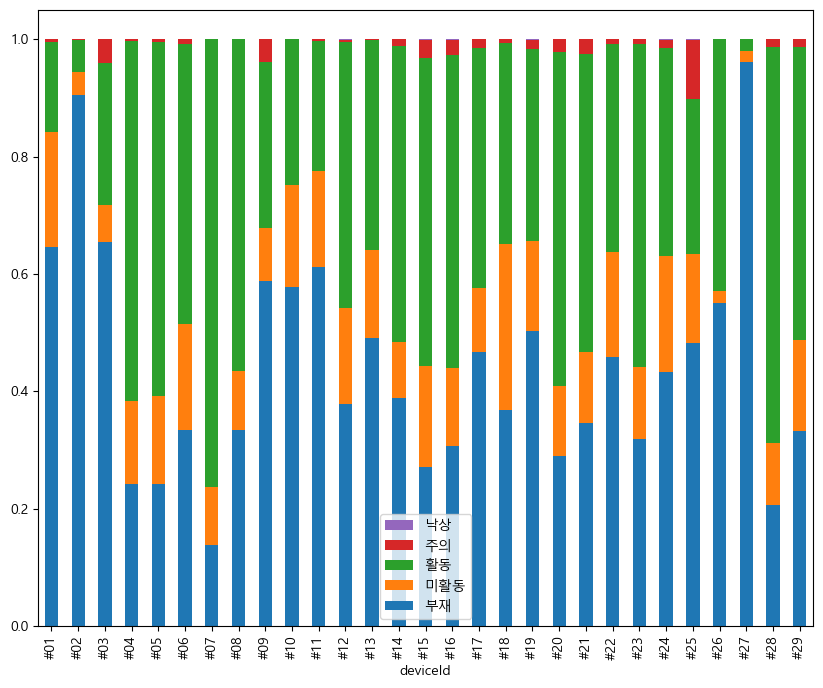

In [348]:
from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/gulim.ttc").get_name()
# rc('font', family=font_name)
plt.rc('font', family='Malgun Gothic')


plt.rcParams['figure.figsize'] = [10, 8]
ax = pivot_df.plot.bar(stacked=True)


handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='best')  # reverse both handles and labels



In [336]:
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

plt.show()